In [1]:
import helpers.batting as bat

players = {
    'Dom Sibley': 519082,
    'Rory Burns': 398778,
    'Sir Alastair Cook': 11728,
    'Sir Andrew Strauss': 20387,
    'Keaton Jennings': 440780
}

sibley = bat.test_innings_by_innings(players['Dom Sibley'])
burns = bat.test_innings_by_innings(players['Rory Burns'])
cook = bat.test_innings_by_innings(players['Sir Alastair Cook'])
strauss = bat.test_innings_by_innings(players['Sir Andrew Strauss'])
jennings = bat.test_innings_by_innings(players['Keaton Jennings'])

In [2]:
sibley_trim = sibley[sibley.did_bat].copy()
burns_trim = burns[burns.did_bat].copy()
cook_trim = cook[cook.did_bat].copy()
strauss_trim = strauss[strauss.did_bat].copy()
jennings_trim = jennings[jennings.did_bat].copy()

In [3]:
for df in [sibley_trim, burns_trim, cook_trim, strauss_trim, jennings_trim]:
    df['cm_runs'] = df.loc[:, 'score'].astype(int).cumsum()    
    df['cm_balls'] = df.loc[:, 'balls_faced'].astype(int).cumsum()

In [4]:
max_innings = max([max(x.index) for x in [sibley_trim, burns_trim, cook_trim, strauss_trim, jennings_trim]])
max_runs = max([max(x.cm_runs) for x in [sibley_trim, burns_trim, cook_trim, strauss_trim, jennings_trim]])
max_balls = max([max(x.cm_balls) for x in [sibley_trim, burns_trim, cook_trim, strauss_trim, jennings_trim]])

In [5]:
[max_innings, max_runs, max_balls]

[291, 12472, 26562]

In [6]:
sibley_trim.loc[:, ['cm_runs', 'cm_balls', 'is_hundred']].head()

,cm_runs,cm_balls,is_hundred
0,22,63,False
1,34,125,False
2,38,145,False
3,42,157,False
4,71,247,False


In [7]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import pandas as pd

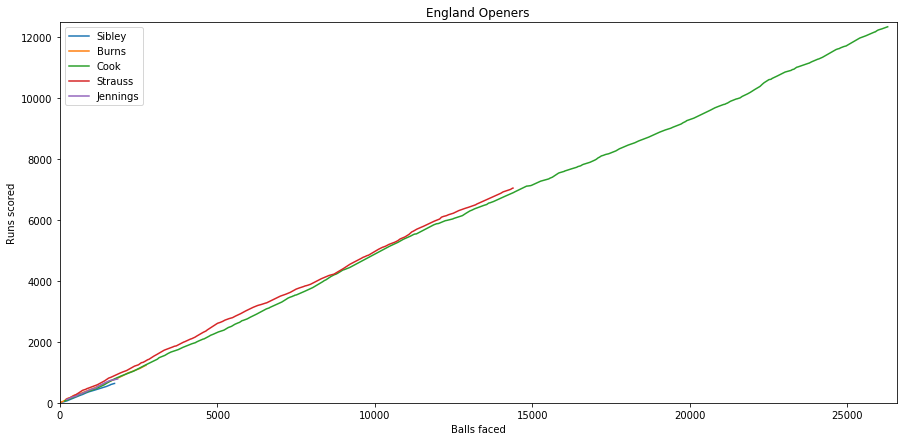

In [8]:
fig, ax = plt.subplots(figsize=(15,7))

ax.set_title('England Openers')
ax.set_ylabel('Runs scored')
ax.set_xlabel('Balls faced')
ax.set_ylim(bottom=0,top=max_runs)
ax.set_xlim(left=0,right=max_balls)

line1, = ax.plot([], [], label='Sibley')
line2, = ax.plot([], [], label='Burns')
line3, = ax.plot([], [], label='Cook')
line4, = ax.plot([], [], label='Strauss')
line5, = ax.plot([], [], label='Jennings')

def init():
    line1.set_data([0], [0])b
    b
    line2.set_data([0], [0])
    line3.set_data([0], [0])
    line4.set_data([0], [0])
    line5.set_data([0], [0])
    return [line1,line2,line3,line4,line5]

# balls\runs
def update(i):
    line1.set_data(sibley_trim.loc[:i, 'cm_balls'], sibley_trim.loc[:i, 'cm_runs'])
    line2.set_data(burns_trim.loc[:i, 'cm_balls'], burns_trim.loc[:i, 'cm_runs'])
    line3.set_data(cook_trim.loc[:i, 'cm_balls'], cook_trim.loc[:i, 'cm_runs'])
    line4.set_data(strauss_trim.loc[:i, 'cm_balls'], strauss_trim.loc[:i, 'cm_runs'])
    line5.set_data(jennings_trim.loc[:i, 'cm_balls'], jennings_trim.loc[:i, 'cm_runs'])
    return [line1,line2,line3,line4,line5]

ani = animation.FuncAnimation(fig, update, max_innings, init_func=init, interval=250, blit=True)

plt.legend(loc="upper left")

plt.show
HTML(ani.to_html5_video())

In [12]:
ani.save('openers.gif', writer='imagemagick', fps=10)